# Model manager

This is a model manager that will manage machine learning models for the micro framework
- Data preparation
- Model training
- Model storage

## Data preparation

In [68]:
import pandas as pd
'''
Read data into a Pandas dataframe 
'''

df = pd.read_csv("data/dataset.csv")
df.reset_index()
df.head()

,Unnamed: 0,price_per_area,rooms,fee,living_space,supplemental_area,price,asked_price,land_area,longitude,latitude,year,month,day,address,floor,typeSummary
0,0,20000.0,2.0,3833.0,50.0,NaN,1000000.0,995000.0,NaN,59.623836,16.570182,2020,6,11,Haga parkgata 9B,0.0,Bostadsrättslägenhet
1,1,96212.0,3.0,3944.0,66.0,NaN,6350000.0,5790000.0,NaN,59.319173,18.038294,2020,6,12,Heleneborgsgatan 5C,0.0,Bostadsrättslägenhet
2,2,20541.0,3.0,4948.0,92.5,NaN,1900000.0,1950000.0,NaN,63.181727,14.639372,2020,6,15,Rådhusgatan 28 A,0.0,Bostadsrättslägenhet
3,3,34568.0,3.0,4663.0,81.0,NaN,2800000.0,2995000.0,NaN,59.439847,18.073676,2020,6,10,"Kometvägen 35, vån 3",3.0,Bostadsrättslägenhet
4,4,56538.0,2.0,2904.0,52.0,NaN,2940000.0,2495000.0,NaN,59.295118,18.106403,2020,6,10,Ulricehamnsvägen 4,0.0,Bostadsrättslägenhet


In [2]:
df.describe()

,Unnamed: 0,price_per_area,rooms,fee,living_space,supplemental_area,price,asked_price,land_area,longitude,latitude,year,month,day,floor
count,2446.000000,2390.000000,2375.000000,1433.000000,2392.000000,710.000000,2.446000e+03,2.430000e+03,1.000000e+03,2446.000000,2446.000000,2446.0,2446.0,2446.000000,2446.000000
mean,1222.500000,36985.372385,3.403368,3728.357990,87.042559,41.252113,2.864402e+06,2.703596e+06,4.757620e+03,58.889279,15.908270,2020.0,6.0,11.810303,0.386263
std,706.243702,25616.539904,1.720102,1322.843515,47.306871,39.878895,2.184230e+06,2.091508e+06,4.038677e+04,1.868170,2.524556,0.0,0.0,1.678930,1.845948
min,0.000000,982.000000,1.000000,0.000000,0.000000,0.000000,5.500000e+04,7.500000e+04,1.030000e+02,55.346335,11.176771,2020.0,6.0,9.000000,0.000000
25%,611.250000,19672.250000,2.000000,2795.000000,55.000000,9.000000,1.495000e+06,1.375000e+06,6.515000e+02,57.731481,13.224915,2020.0,6.0,10.000000,0.000000
50%,1222.500000,30909.000000,3.000000,3655.000000,77.750000,30.000000,2.420000e+06,2.250000e+06,1.092500e+03,59.280953,16.582154,2020.0,6.0,11.000000,0.000000
75%,1833.750000,47673.750000,4.000000,4580.000000,110.000000,65.000000,3.700000e+06,3.495000e+06,1.836250e+03,59.435408,18.004513,2020.0,6.0,13.000000,0.000000
max,2445.000000,418750.000000,20.000000,9321.000000,560.000000,335.000000,2.530000e+07,2.300000e+07,1.007140e+06,67.854406,24.136828,2020.0,6.0,16.000000,56.000000


In [69]:
'''
Split into features and target
'''

X = df[['rooms', 'fee', 'living_space', 'supplemental_area', 'land_area', 'longitude', 'latitude', 'year', 'month', 'day', 'floor']] #.to_numpy()
X = X.reindex(sorted(X.columns), axis=1)
Y = df.price #.to_numpy()

## Model training 

In [70]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import LabelEncoder

# class CustomTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.le = LabelEncoder()
        
#     def fit(self, X: list, y=None):
#         self.le.fit(X.typeSummary.fillna(-1))
#         return self

#     def transform(self, X):
#         X["typeSummary"] = self.le.transform(X.typeSummary.fillna(-1))
#         return X

In [71]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# clf = Pipeline([
#     ('CustomTransformer', CustomTransformer()),
#     ('XGBRegressor', XGBRegressor())
# ])

clf = XGBRegressor()
clf.fit(X, Y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

## Model storage 

In [72]:
import time 
import pickle

model_name = "sample-Hemnet"
full_name = "models/model-{}-{}.model".format(model_name, time.time())

with open(full_name, "wb") as f:
    pickle.dump(clf, f)
    
print(full_name)

models/model-sample-Hemnet-1592385899.3558443.model


## Test model 

In [73]:
with open(full_name, "rb") as f:
    deserialized_model = pickle.load(f)

In [74]:
sample = X[2:3]
res = deserialized_model.predict(sample)[0]
print("Input:", sample)
print("Result:", res)

Input:    day     fee  floor  land_area   latitude  living_space  longitude  month  \
2   15  4948.0    0.0        NaN  14.639372          92.5  63.181727      6   

   rooms  supplemental_area  year  
2    3.0                NaN  2020  
Result: 1905049.8


In [75]:
sample #.tolist()

,day,fee,floor,land_area,latitude,living_space,longitude,month,rooms,supplemental_area,year
2,15,4948.0,0.0,NaN,14.639372,92.5,63.181727,6,3.0,NaN,2020


In [94]:
import json


# raw = {'rooms': '6', 'fee': '2100', 'living_space': '263', 'floor': '9', 'supplemental_area': '227', 'land_area': '123', 'longitude': 13, 'latitude': 0, 'year': '2020', 'month': '06', 'day': '16'}
raw = {'rooms': '3', 'fee': '3143', 'living_space': '51', 'floor': '1', 'supplemental_area': '0', 'land_area': '0', 'latitude': 18.0052419, 'longitude': 59.3291077, 'year': '2020', 'month': '06', 'day': '17'}
series = pd.Series(raw, raw.keys())
series = series.astype("float")

In [95]:
s = pd.DataFrame.from_dict({"row": raw}, orient='index')
s = s.reindex(sorted(s.columns), axis=1)
s = s.astype("float")
s
deserialized_model.predict(s)[0]

4311338.0

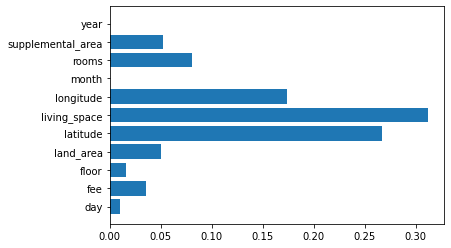

In [80]:
import matplotlib.pyplot as plt

plt.barh(X.columns, clf.feature_importances_)
plt.show()

In [87]:
X.longitude[23]

55.59854489931772